# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

*Notes:* 

- Solve the questions with python.

- Round the final answer to three decimal places.

In [86]:
%matplotlib inline
from scipy import stats
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import bernoulli

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math


## Bernoulli's Distribution

In a basket containing 100 fruits, there are 60 apples and 40 oranges. 

A fruit is picked randomly from the basket. 

1. **What is the probability that the fruit is apple?**
1. **What is the probability that it is an orange?**

In [8]:
"""
Calculate:
p = probability that the fruit is an apple 
q = probability that the fruit is an orange
"""

# your code here
p_apple = 60/(60+40)
q_orange = 40/(60+40)

print('Probability of the fruit is an apple:', p_apple)
print('Probability of the fruit is an orange:', q_orange)

Probability of the fruit is an apple: 0.6
Probability of the fruit is an orange: 0.4


Now we take a random sample of 20 fruits from the basket. After each fruit is taken, a new fruit of the same type is replaced in the basket. Therefore, every time we are taking 1 fruit from 100 fruits. 

1. **What is the probability that the first 5 fruits are all apples?**

1. **What is the probability that the first 5 fruits are all apples and the next 15 fruits are all oranges?**

You can include the `p` and `q` probabilities you previous calculated in your solution.

In [32]:
# your code here
# I gonna need see the formulas # I think in intro-prob i have something like... I'm just at 3 am programmin so i need keep recording what i'm doing!
#1) P(A) ** 5 - We talking the probability that the first 5 so its ok find this
#2) P(A)^5 *P(0)15 -
def percent (x):
    return round(x *100)
#Quest 1
apple = p_apple**5
apple_perc = percent(apple)
print('1) - ',  round(apple,3))
print('Probability % Apple:', round(apple_perc, 2), '%')

orange = q_orange**5 * q_orange**15
orange_perc = percent(orange)
print('2) - ', round(orange, 2))
print('Probability % Orange:',round(orange_perc, 4), '%')


1) -  0.078
Probability % Apple: 8 %
2) -  0.0
Probability % Orange: 0 %


## Binomial Distribution

Similar to the above problem, this time again we randomly sample 20 fruits.

**What is the probability that this time the sample contains 5 apples and 15 oranges?**

Please note that this time the order of the fruits being picked does not matter.

In [67]:
# your code here
#Question 1 - So! Let's get the dice example! And P(x =5 )w
#Binomal ou of 20 trials with 0.6 proability x = b(20,p_apple)
#Order not matter!!!

n = 20
x = 5

binomial = binom(n, p_apple)

print('Binomial Probability:', binomial.pmf(x))
print('Other values', dict({'PMF':binomial.pmf(x), 'CDF': binomial.cdf(x), 'MEAN':binomial.mean(), 'VARIANCE':binomial.var(), 'Standard Deviation':binomial.std()}))


Binomial Probability: 0.0012944935222876511
Other values {'PMF': 0.0012944935222876511, 'CDF': 0.001611524643456288, 'MEAN': 12.0, 'VARIANCE': 4.800000000000001, 'Standard Deviation': 2.1908902300206647}


In the lesson we also discussed CDF (cumulative distribution function). In the context of the above problem, **what is the probability that less than 5 fruits picked are apples?**

Write the formula and calculate the probability below.

In [69]:
# your code here
# Probability < 5
print('Probability is < 5: ', binomial.cdf(4))


Probability is < 5:  0.0003170311211686301


**Plot the PDF (probability distributiom function) for the above binomial distribution.**

*Hint: The range of x in a binomial distribution is from `0` to `n`.*

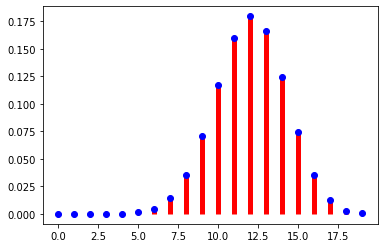

In [85]:
# your code here
# Please label the axes and give a title to the plot
# Class Example
x = np.arange(0,n)
fig, ax = plt.subplots(1, 1)
ax.plot(x, binom.pmf(x, n, p_apple), 'bo')
ax.vlines(x, 0, binom.pmf(x, n, p_apple), colors='r', lw=5)
plt.show()



## Poisson Distribution

In this challenge you are required to use the Math library in python to solve the problems.

In the UEFA champions league tournament, the average number of goals scored in a match is 2.3. 

**What is the probability that the number of goals scored in a match is 5?**

*Hint: Use the exp() in the math library*

And to calculate the factorial, you can use the following code:

```python
import math
math.factorial(n) # n is the number you want to find the factorial of
```

In [92]:
# your code here
mu = 2.3
k = 5

poisson_probs = math.exp(-mu)*mu**k/math.factorial(k)
print('Probability of 5 Goals:', poisson_probs)

print('\n')
#Pythonical wa

poisson_probs = poisson.pmf(k, mu)
print('Probability of 5 Goals:',poisson_probs)

Probability of 5 Goals: 0.0537750255819468


Probability of 5 Goals: 0.053775025581946814


**Draw a poisson probability distribution plot for the number of goals to be between 0 to 10.**

(array(2.3), array(2.3), array(0.65938047), array(0.43478261))


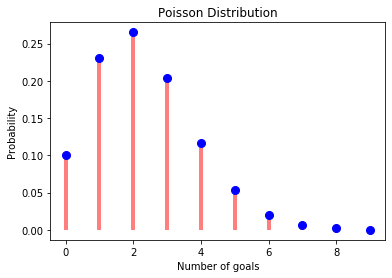

In [98]:
# your code here
# Please label the axes and give a title to the plot 
mu = 2.3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')
# Dont get whats if going 
x= np.arange(0,10)
plt.plot(x, stats.poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.title('Poisson Distribution')
plt.xlabel('Number of goals')
plt.ylabel('Probability')
plt.vlines(x, 0, poisson.pmf(x, mu), colors='r', lw=4, alpha=0.5)
#MSVK??
print(poisson.stats(mu, moments='msvk'))
